In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [4]:
import pandas as pd
df = pd.read_csv('data/score.csv')
df['학년'] = [3,3,2,1,1,3,2,2]
group = df.groupby('SW특기').size()
group


SW특기
C#            2
Java          3
Javascript    1
Python        2
dtype: int64

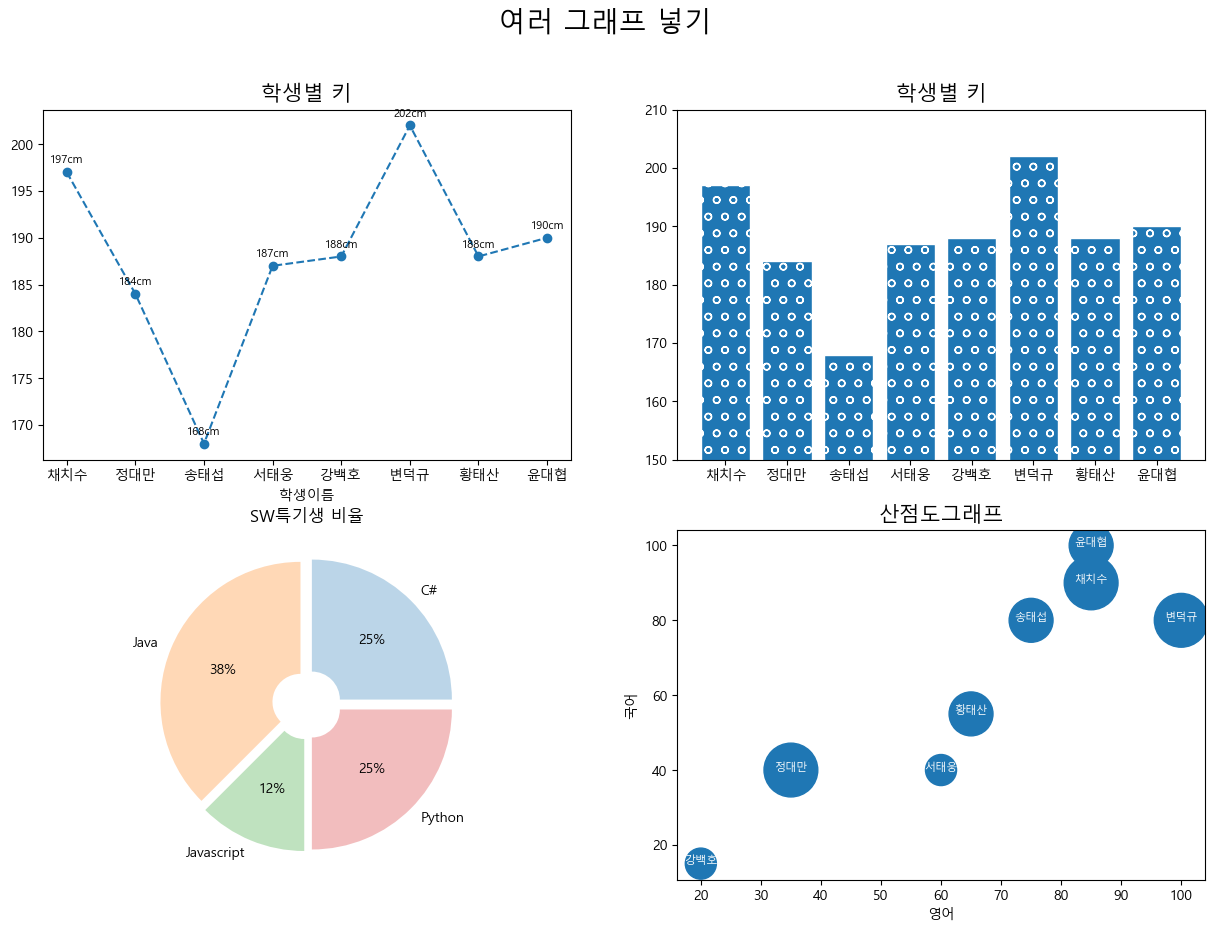

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('여러 그래프 넣기', size=20)
#첫번째 그래프
axs1 = axs[0, 0]
axs1.plot(df['이름'], df['키'], marker='o', ls='--')
axs1.set_title('학생별 키', size=15)
axs1.set_xlabel('학생이름')
for idx in range(len(df)):
    x = idx
    y = df.loc[idx, '키']
    text = f'{y}cm'
    axs1.text(x, y+1, text, size=8, ha='center')

#두번째 그래프
axs2 = axs[0, 1]
axs2.set_title('학생별 키', size=15)
axs2.bar(df['이름'], df['키'], hatch='o', ec='w')
axs2.set_ylim(150, 210)

#세번째 그래프
axs3 = axs[1, 0]
axs3.set_title('SW특기생 비율')
group = df.groupby('SW특기').size()
axs3.pie(group.values, labels=group.index, autopct='%.0f%%', 
         wedgeprops={'width':0.8, 'alpha':0.3},
         explode=[0.05]*len(group))


#네번째 그래프
axs4 = axs[1,1]
axs4.set_title('산점도그래프', size=15)
axs4.scatter(df['영어'], df['국어'], sizes = df['학년'] * 500)
axs4.set_xlabel('영어')
axs4.set_ylabel('국어')
for idx in range(len(df)):
    y = df.loc[idx, '국어']
    x = df.loc[idx, '영어']
    text = df.loc[idx, '이름']
    axs4.text(x, y, text, ha='center', size=8, color='w')

plt.show()

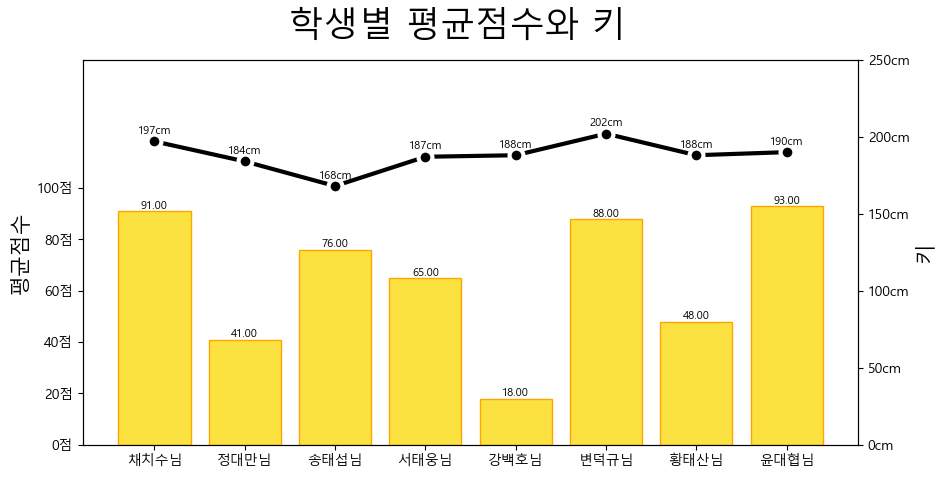

In [ ]:
df['평균'] = df.apply(lambda row:row['국어':'사회'].mean(), axis=1)

fig, ax1 = plt.subplots(figsize=(10, 5))
fig.suptitle('학생별 평균점수와 키', size=25)
ax1.bar(df['이름'], df['평균'], color="#FCE02EE8", ec='orange')
ax1.set_xticks(df['이름'], df['이름']+'님')

ax1.set_ylim(0, 150)
ax1.set_ylabel('평균점수', size=15)
yticks = [y for y in range(0, 101, 20)]
ax1.set_yticks(yticks, [f'{y}점' for y in yticks])
for idx in range(len(df)):
    avg = df.loc[idx, '평균']
    ax1.text(idx, avg+1, f'{avg:.2f}', ha='center', size=8)

ax2 = ax1.twinx()
ax2.plot(df['이름'], df['키'], color='#000000', marker='o',ms=10, mec='w', mew=3, lw=3)
ax2.set_ylim(0, 250)
yticks = [y for y in range(0, 251, 50)]
ax2.set_yticks(yticks, [f'{y}cm' for y in yticks])
ax2.set_ylabel('키', size=15)
for idx in range(len(df)):
    height = df.loc[idx, '키']
    ax2.text(idx, height+5, f'{height}cm', ha='center', size=8)

plt.savefig('data/평균점수와키.png')    
plt.show()

In [9]:
df = pd.read_csv('data/score.csv')
df['평균'] = df.apply(lambda row:row['국어':'사회'].mean(), axis=1)
df

,지원번호,이름,학교,키,국어,영어,수학,과학,사회,SW특기,평균
0,1번,채치수,북산고,197,90,85,100,95,85,Python,91.0
1,2번,정대만,북산고,184,40,35,50,55,25,Java,41.0
2,3번,송태섭,북산고,168,80,75,70,80,75,Javascript,76.0
3,4번,서태웅,북산고,187,40,60,70,75,80,Java,65.0
4,5번,강백호,북산고,188,15,20,10,35,10,Java,18.0
5,6번,변덕규,능남고,202,80,100,95,85,80,C#,88.0
6,7번,황태산,능남고,188,55,65,45,40,35,Python,48.0
7,8번,윤대협,능남고,190,100,85,90,95,95,C#,93.0


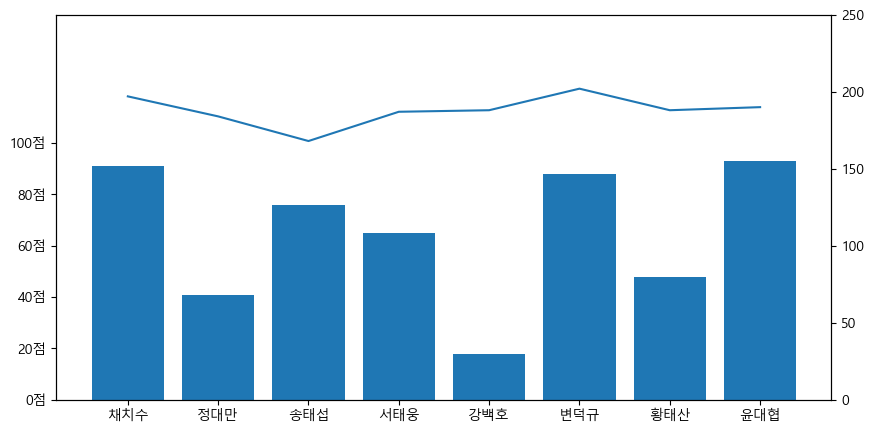

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(df['이름'], df['평균'])
ax.set_ylim(0, 150)
yticks = [y for y in range(0, 101, 20)]
ax.set_yticks(yticks, [f'{y}점' for y in yticks])

ax2 = ax.twinx()
ax2.plot(df['이름'], df['키'])
ax2.set_ylim(0, 250)
plt.show()